<a href="https://colab.research.google.com/github/jxing1233/files_repo/blob/main/testing3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from the PyHIST tutorial website https://pyhist.readthedocs.io/en/latest/testcase/

from IPython.display import Image

# Download necessary dependencies
!apt-get update
!apt-get install openslide-tools python3-openslide
!git clone https://github.com/manuel-munoz-aguirre/PyHIST.git

# To view SVS information
!apt install imagemagick

# Move to the use case folder
%cd PyHIST/use_case/

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,084 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [

In [ ]:
pyhist_path='/content/PyHIST/'
tutorial_path='/content/PyHIST/use_case/'

In [ ]:
import numpy as np
import os
import pandas as pd
import shutil
import subprocess as sub
import time

from multiprocessing import Pool
from IPython.display import display
from PIL import Image

In [ ]:
# Load the IDs
ids = pd.read_csv('TCGA.txt', sep = '\t')
ids.head()

,id,filename,md5,size,state,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type,Tissue,primary_diagnosis
0,925065d2-4c65-41ed-8cf2-f78b3deb8115,TCGA-76-4934-01A-01-TS1.37a9c5e6-3cb3-4d55-909...,074be51c2fd5394c8e5f218572021172,165601441,validated,Biospecimen,Slide Image,TCGA-GBM,TCGA-76-4934,TCGA-76-4934-01A,Primary Tumor,Brain,Glioblastoma
1,6151fa16-50e0-4a2e-aa5c-c27b8ce35efa,TCGA-76-6193-01A-01-TS1.3363a9fa-7731-4da9-9ef...,110546e08baa48ff082a079449f9f76e,107248381,validated,Biospecimen,Slide Image,TCGA-GBM,TCGA-76-6193,TCGA-76-6193-01A,Primary Tumor,Brain,Glioblastoma
2,74bd9f76-e77d-4771-a158-e4a3e88ff2df,TCGA-76-6660-01A-01-TS1.f4ee585a-0716-4726-89d...,aacecb2f25beab2934275dfaa0c44e81,111999909,validated,Biospecimen,Slide Image,TCGA-GBM,TCGA-76-6660,TCGA-76-6660-01A,Primary Tumor,Brain,Glioblastoma
3,fb34971f-57fa-4175-930f-1a548721dfb5,TCGA-76-6662-01A-01-TS1.95ae6f01-16c0-40f8-ae0...,aba6d8fd4ecdaadf2ab3dda774cd5573,256506081,validated,Biospecimen,Slide Image,TCGA-GBM,TCGA-76-6662,TCGA-76-6662-01A,Primary Tumor,Brain,Glioblastoma
4,77157c21-b6c9-486d-9c41-170f3ee2affb,TCGA-76-6663-01A-01-TS1.2486fda9-2f5d-4a2a-899...,d50d3516bba6617bc424c6d2e4b7af77,231613115,validated,Biospecimen,Slide Image,TCGA-GBM,TCGA-76-6663,TCGA-76-6663-01A,Primary Tumor,Brain,Glioblastoma


In [ ]:
# Download and extract the tool

# !pip install https://gdc.cancer.gov/files/public/file/gdc_dtt-ui_v1.0.0_mac_x64.zip

!wget https://gdc.cancer.gov/files/public/file/gdc-client_v1.6.1_Ubuntu_x64.zip # ubuntu version
!unzip -o gdc-client_v1.6.1_Ubuntu_x64.zip # unzip the zip file

--2023-07-16 02:35:28--  https://gdc.cancer.gov/files/public/file/gdc-client_v1.6.1_Ubuntu_x64.zip
Resolving gdc.cancer.gov (gdc.cancer.gov)... 151.101.1.193, 151.101.65.193, 151.101.129.193, ...
Connecting to gdc.cancer.gov (gdc.cancer.gov)|151.101.1.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23940006 (23M) [application/zip]
Saving to: ‘gdc-client_v1.6.1_Ubuntu_x64.zip’

gdc-client_v1.6.1_U 100%[===================>]  22.83M   112MB/s    in 0.2s    

2023-07-16 02:35:28 (112 MB/s) - ‘gdc-client_v1.6.1_Ubuntu_x64.zip’ saved [23940006/23940006]

Archive:  gdc-client_v1.6.1_Ubuntu_x64.zip
 extracting: gdc-client              


In [ ]:
!./gdc-client download -h

usage: gdc-client download [-h] [--debug] [--log-file LOG_FILE] [--color_off]
                           [-t TOKEN_FILE] [-d DIR] [-s server]
                           [--no-segment-md5sums] [--no-file-md5sum]
                           [-n N_PROCESSES]
                           [--http-chunk-size HTTP_CHUNK_SIZE]
                           [--save-interval SAVE_INTERVAL] [-k]
                           [--no-related-files] [--no-annotations]
                           [--no-auto-retry] [--retry-amount RETRY_AMOUNT]
                           [--wait-time WAIT_TIME] [--latest] [--config FILE]
                           [-m MANIFEST]
                           [file_id [file_id ...]]

positional arguments:
  file_id               The GDC UUID of the file(s) to download

optional arguments:
  -h, --help            show this help message and exit
  --debug               Enable debug logging. If a failure occurs, the program
                        will stop.
  --log-file LOG_FILE   Save

In [ ]:
!./gdc-client download -m d570eccc-3c1c-4c4f-ae04-96be71fbe016

usage: gdc-client download [-h] [--debug] [--log-file LOG_FILE] [--color_off]
                           [-t TOKEN_FILE] [-d DIR] [-s server]
                           [--no-segment-md5sums] [--no-file-md5sum]
                           [-n N_PROCESSES]
                           [--http-chunk-size HTTP_CHUNK_SIZE]
                           [--save-interval SAVE_INTERVAL] [-k]
                           [--no-related-files] [--no-annotations]
                           [--no-auto-retry] [--retry-amount RETRY_AMOUNT]
                           [--wait-time WAIT_TIME] [--latest] [--config FILE]
                           [-m MANIFEST]
                           [file_id [file_id ...]]

positional arguments:
  file_id               The GDC UUID of the file(s) to download

optional arguments:
  -h, --help            show this help message and exit
  --debug               Enable debug logging. If a failure occurs, the program
                        will stop.
  --log-file LOG_FILE   Save

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gdc_manifest_20230628_194140.txt to gdc_manifest_20230628_194140.txt


ERROR: An unexpected error has occurred during normal operation of the client. Please report the following exception to GDC support <support@nci-gdc.datacommons.io>.
--- Logging error ---
Traceback (most recent call last):
  File "gdc-client", line 103, in <module>
  File "gdc_client-1.6.1-py3.7.egg/gdc_client/download/parser.py", line 68, in download
  File "gdc_client-1.6.1-py3.7.egg/gdc_client/query/versions.py", line 40, in get_latest_versions
requests.exceptions.HTTPError: The following request https://api.gdc.cancer.gov/files/versions for ids ['6315a0df-c8ca-4ade-bb42-27e431ded1bb'] returned with status code: 503 and response content: b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN" "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd"> <html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" version="XHTML+RDFa 1.0" dir="ltr" xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns:dc="http://purl.org/dc/terms/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:og="http://og
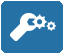
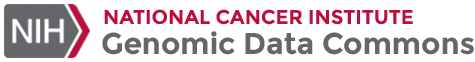

In [ ]:
!./gdc-client download -m gdc_manifest_20230628_194140.txt

In [ ]:
uploaded1 = files.upload()

Saving gdc_manifest_20230630_210858.txt to gdc_manifest_20230630_210858.txt


In [ ]:
!gdown --id 1uTGow4yeqyt7tpdQ54pPumPmmcS_bR-z

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uTGow4yeqyt7tpdQ54pPumPmmcS_bR-z
To: /content/PyHIST/use_case/gdc_manifest_20230630_210858.txt
100% 492/492 [00:00<00:00, 2.19MB/s]


In [ ]:
!./gdc-client download -m ./gdc_manifest_20230630_210858.txt

100% [#############################################] Time:  0:00:35  28.1 MiB/s 
100% [#############################################] Time:  0:00:05  22.2 MiB/s 
100% [#############################################] Time:  0:00:09  23.5 MiB/s 
Successfully downloaded: 3


In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [ ]:
%%sx?

In [ ]:
%cd content/PyHIST/use_case/

%%shell
pyhist.py \
    --save-patches \
    --save-tilecrossed-image \
    --borders 0000 \
    --corners 1010 \
    --percentage-bc 1 \
    --content-threshold 0.4 \
    --patch-size 512 \
    --output-downsample 4 \
    --k-const 1000 \
    --minimum_segmentsize 1000 \
    --output "$outpath" \
    "$filename"

SyntaxError: ignored

In [ ]:
%cd /content/PyHIST/

/content/PyHIST


In [ ]:
%%shell
k=1
start=`date +%s`

for filename in use_case/output/*.svs
do
  id=$(basename "$filename" .svs)
  echo "Processing slide $k: $id"

  # Output filepath
  outpath="use_case/output/"

  # Run PyHIST
  python pyhist.py \
    --save-patches \
    --save-tilecrossed-image \
    --borders 0000 \
    --corners 1010 \
    --percentage-bc 1 \
    --content-threshold 0.4 \
    --patch-size 512 \
    --output-downsample 4 \
    --k-const 1000 \
    --minimum_segmentsize 1000 \
    --output "$outpath" \
    "$filename"

  k=$((k+1))
done

end=`date +%s`
runtime=$((end-start))
echo "Elapsed time: $runtime seconds"

Processing slide 1: *
Traceback (most recent call last):
  File "/content/PyHIST/pyhist.py", line 2, in <module>
    import openslide
  File "/usr/lib/python3/dist-packages/openslide/__init__.py", line 26, in <module>
    from collections import Mapping
ImportError: cannot import name 'Mapping' from 'collections' (/usr/lib/python3.10/collections/__init__.py)
Elapsed time: 0 seconds
